# DataJoint U24 - Workflow Trial

This notebook will describe the steps to explore trialized data in a DataJoint framework.
Prior to using this notebook, please refer to the README for the installation instructions.

In [1]:
import os; from pathlib import Path
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='workflow-trial', ("Please move to the workflow "
                                                         + "directory")
import datajoint as dj; dj.config.load('dj_local_conf.json')

In [2]:
from workflow_trial.pipeline import lab, subject, session, trial, event
from workflow_trial.paths import get_trial_root_data_dir

Connecting cbroz@tutorial-db.datajoint.io:3306


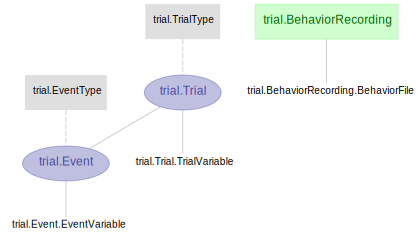

In [3]:
dj.Di(trial)

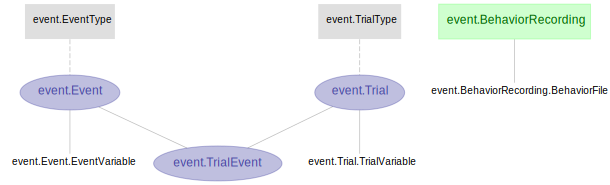

In [4]:
dj.Di(event)

Currently, ingesting subjects and sessions matches `workflow-session`. The CSVs that
feed `ingest_trials` are currently empty and could be populated with example data.

In [5]:
from workflow_trial.ingest import ingest_subjects, ingest_sessions, ingest_trials
ingest_subjects(); ingest_sessions() #; ingest_trials()


---- Inserting 0 entry(s) into subject ----

---- Inserting 0 entry(s) into session ----

---- Inserting 0 entry(s) into session_directory ----

---- Inserting 0 entry(s) into session_note ----


## Workflow architecture

Importing the module `workflow_trial.pipeline` is sufficient to create tables inside the elements. This workflow comes prepackaged with example data and ingestion functions to populate subject, session, trialized or event tables.

In [6]:
lab.Lab()

lab Abbreviated lab name,lab_name full lab name,institution,address,time_zone 'UTC±X' format for NWB export
LabA,The Example Lab,Example Uni,'221B Baker St,London NW1 6XE
LabB,The Other Lab,Other Uni,'Oxford OX1 2JD,United Kingdom'


In [8]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject5,F,2020-01-01,rich
subject6,M,2020-01-01,manuel
subjectX,F,2020-01-01,manuel
subjectY,M,2020-01-01,manuel
subjectZ,M,2020-01-01,manuel


In [10]:
session.Session()

subject,session_datetime
subject5,2020-04-15 11:16:38
subject6,2021-06-02 14:04:22
subject6,2021-06-03 14:04:22


## Explore each table

In [11]:
# check table definition with describe()
subject.Subject.describe()

# Animal Subject
subject              : varchar(8)                   
---
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



'# Animal Subject\nsubject              : varchar(8)                   \n---\nsex                  : enum(\'M\',\'F\',\'U\')            \nsubject_birth_date   : date                         \nsubject_description="" : varchar(1024)                \n'

## Insert data into Manual and Lookup tables

Tables in this workflow are either manual tables or lookup tables. To insert into these tables, DataJoint provide method `.insert1()` and `insert()`.

In [12]:
subject.Subject.insert1(
    dict(subject='subject1', sex='M', subject_birth_date='2020-12-30', 
         subject_description='test animal'), skip_duplicates=True)
subject.Subject.insert1(
    ('subject2', 'F', '2020-11-30', 'test animal'), skip_duplicates=True)

`skip_duplicates=True` will prevent an error if you already have data for the primary keys in a given entry.

In [13]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject5,F,2020-01-01,rich
subject6,M,2020-01-01,manuel
subjectX,F,2020-01-01,manuel
subjectY,M,2020-01-01,manuel
subjectZ,M,2020-01-01,manuel


In [14]:
# `insert()` takes a list of dicts or tuples
subject.Subject.insert(
    [dict(subject='subject3', sex='F', subject_birth_date='2020-12-30', 
            subject_description='test animal'),
     dict(subject='subject4', sex='M', subject_birth_date='2021-02-12', 
          subject_description='test animal')
    ],
    skip_duplicates=True)
subject.Subject.insert(
    [
        ('subject7', 'U', '2020-08-30', 'test animal'),
        ('subject8', 'F', '2020-09-30', 'test animal')
    ],
    skip_duplicates=True)

In [15]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
subject1,M,2020-12-30,test animal
subject2,F,2020-11-30,test animal
subject3,F,2020-12-30,test animal
subject4,M,2021-02-12,test animal
subject5,F,2020-01-01,rich
subject6,M,2020-01-01,manuel
subject7,U,2020-08-30,test animal
subject8,F,2020-09-30,test animal
subjectX,F,2020-01-01,manuel
subjectY,M,2020-01-01,manuel


For more documentation of insert, please refer to [DataJoint Docs](https://docs.datajoint.io/python/manipulation/1-Insert.html) and [DataJoint playground](https://playground.datajoint.io/)

## Insert into Manual and Lookup tables with Graphical User Interface

DataJoint also provides a Graphical User Interface [DataJoint Labbook](https://github.com/datajoint/datajoint-labbook) to support manual data insertions into DataJoint workflows. Visit our [documentation here](https://datajoint.github.io/datajoint-labbook/).

![DataJoint Labbook preview](https://datajoint.github.io/datajoint-labbook/_images/InsertComponentHighlight.png)